# Project: Investigate a Dataset - [Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

> **Dataset**: TMDb movie data  
**Source**: [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)  

### Notes 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### informations about movies dataset
<ul>
<li> columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
<li> There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
<li> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
</ul>



# Questions for Analysis

(1) Which genres are most popular from year to year?  

(2) What kinds of properties are associated with movies that have high revenues?

----------------------------------------------

In [1]:
# some checks
!pip install --upgrade seaborn
!pip install --upgrade numpy
!pip install --upgrade pandas
import seaborn as sns
# restart kernel if needed

    100% |████████████████████████████████| 296kB 9.0MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 1.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.4MB/s eta 0:00:01   36% |███████████▊                    | 4.9MB 73.1MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 456kB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 20.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for pillow ... done
  Stored in directory: /root/.cache/pip/wheels/a7/69/9a/bba9fca6782340f88dbc378893095722a663cbc618e58fe401
Successfully built pillow
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      

<a id='wrangling'></a>
# Data Wrangling

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# inline with the notebook:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [43]:
#loading data

movies_df = pd.read_csv('Database_TMDb_movie_data/movies_dataset.csv')

def movies(num_of_rows): # dataset function
    return movies_df.head(num_of_rows)
    
movies(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Getting the structure of the dataset & check the number of null values
df_shape = movies_df.shape # shape of the dataset
sum_of_null = movies_df.isnull().sum().sum() # number of null values

print('shape =',df_shape)
print('sum of null =', sum_of_null)

shape = (10866, 21)
sum of null = 13434


In [25]:
# checking for missing values & inspecting data types
def Info():
    movies_df.info()
    
    
Info()    

<class 'pandas.core.frame.DataFrame'>
Index: 19570 entries, Heist to Long Weekend
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    19570 non-null  object        
 1   imdb_id               19570 non-null  object        
 2   popularity            19570 non-null  float64       
 3   budget                19570 non-null  int64         
 4   revenue               19570 non-null  int64         
 5   cast                  19570 non-null  object        
 6   director              19570 non-null  object        
 7   tagline               19570 non-null  object        
 8   keywords              19570 non-null  object        
 9   overview              19570 non-null  object        
 10  runtime               19570 non-null  int64         
 11  genres                19570 non-null  object        
 12  production_companies  19570 non-null  object        
 13  release_da

### ---columns with missing values---

<ul>
<li>imdb_id
<li>cast
<li>homepage (too many missing values)
<li>director
<li>tagline
<li>keywords
<li>overview
<li>genres
<li>production_companies   
</ul>

### ---columns that needs new data type
id --> object  
release_date --> Datetime

In [6]:
# keywords column not clear in the full dataset
movies_df['keywords'].head(10)

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
5    father-son relationship|rape|based on novel|mo...
6    saving the world|artificial intelligence|cybor...
7          based on novel|mars|nasa|isolation|botanist
8    assistant|aftercreditsstinger|duringcreditssti...
9         dream|cartoon|imaginary friend|animation|kid
Name: keywords, dtype: object


### Data Cleaning

In [7]:
# The most column that got null values is 'homepage'
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### removing 'homepage' column
**reasons**: since the homepage column got more than 70% of the whole null values in the dataset &
my analysis just depend on other factors like ratings, genres, budgets, revenues, or cast data,
then the homepage column is not needed.

In [8]:
# deleting the 'homepage' column
movies_df.drop(columns = 'homepage', inplace = True)

In [45]:
# filling the other missing data with unknow
movies_df.fillna('Unknow', inplace = True)
sum_of_null = movies_df.isnull().sum().sum()

print('null values after cleaning:',sum_of_null)
movies(3)

null values after cleaning: 0


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### The 'original_title' column has been modified to be the index of the dataset

In [10]:
movies_df.index = movies_df['original_title']
movies_df.drop(columns = 'original_title', inplace = True)

### changing data types

In [26]:
movies_df['id'] = movies_df['id'].astype(object) # id changed to --> object
movies_df['release_date'] = pd.to_datetime(movies_df['release_date']) # release_dat changed to --> Datetime
Info() # second time to use the function

<class 'pandas.core.frame.DataFrame'>
Index: 19570 entries, Heist to Long Weekend
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    19570 non-null  object        
 1   imdb_id               19570 non-null  object        
 2   popularity            19570 non-null  float64       
 3   budget                19570 non-null  int64         
 4   revenue               19570 non-null  int64         
 5   cast                  19570 non-null  object        
 6   director              19570 non-null  object        
 7   tagline               19570 non-null  object        
 8   keywords              19570 non-null  object        
 9   overview              19570 non-null  object        
 10  runtime               19570 non-null  int64         
 11  genres                19570 non-null  object        
 12  production_companies  19570 non-null  object        
 13  release_da

In [12]:
# check duplicated values
sum_of_duplicates = movies_df.duplicated().sum()

print('sum of duplicates =', sum_of_duplicates)
movies_df.loc['TEKKEN'] # The index of duplicated value

sum of duplicates = 1


,id,imdb_id,popularity,budget,revenue,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,,,,,,
TEKKEN,42194,tt0411951,0.59643,30000000,967000,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0
TEKKEN,42194,tt0411951,0.59643,30000000,967000,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [13]:
# removing duplicated value
movies_df.drop_duplicates(inplace = True)
movies_df.duplicated().sum()

0

### function for replacing 'pipe |' to specific columns

In [14]:
def replacing(column):
    movies_df[column] = movies_df[column].str.replace('|', ' ')

replacing('cast')
replacing('keywords')


### removing outliers

In [15]:
check_specific_columns = ['popularity', 'budget', 'revenue', 'release_year']

Q1 = movies_df[check_specific_columns].quantile(0.25)
Q3 = movies_df[check_specific_columns].quantile(0.75)
IQR = Q3 - Q1 # Getting The Interquartile Range

lower_bound = Q1 - 1.5 * IQR # any data lower than the value of lower bound consider an outlier
upper_bound = Q3 + 1.5 * IQR # any data higher than the value of upper bound consider an outlier

for column in check_specific_columns:
    movies_df = movies_df[(movies_df[column] >= lower_bound[column]) & (movies_df[column] <= upper_bound[column])]


### some rows in the outliers has beed deleted
but still there is more than 8000 data that can be used for the analysis

<a id='eda'></a>
# Exploratory Data Analysis

### Descriptive Statistics

In [16]:
movies_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8201.000000,8.201000e+03,8.201000e+03,8201.000000,8201.000000,8201.000000,8201.000000,8.201000e+03,8.201000e+03
mean,0.375114,4.016406e+06,5.014607e+06,98.811364,62.208511,5.895622,2002.574442,5.243054e+06,7.792663e+06
std,0.275660,7.938898e+06,1.152310e+07,31.958554,101.372480,0.962400,11.271661,1.086065e+07,2.067764e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1971.000000,0.000000e+00,0.000000e+00
25%,0.176222,0.000000e+00,0.000000e+00,89.000000,15.000000,5.300000,1995.000000,0.000000e+00,0.000000e+00
50%,0.310779,0.000000e+00,0.000000e+00,96.000000,27.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.498926,4.000000e+06,1.332231e+06,107.000000,63.000000,6.600000,2012.000000,4.849046e+06,1.497553e+06
max,1.470711,3.700000e+07,6.000000e+07,900.000000,1563.000000,9.200000,2015.000000,1.341094e+08,3.067830e+08


**budget & revenue**  
-have medians equal to zero, suggesting a large number of movies have missing or zero values.   
-it has high variation though most values are close to zero  
**popularity**  
-has a mean of 0.375, median of 0.311, shows that it has a graph skewed right (indicate that low number of movies that get high popularity)
& most values is close to the mean  
**release_year**  
-it shows that high number of movies have been made in the recent years.  
-movies spanning from 1971 to 2015.

notes:  
Vote count, revenue, and budget have extreme values (right-skewed).  
Vote average is relatively normally distributed around 6.

### Data Visualization:

### Research Question 1 (Which genres are most popular from year to year? )

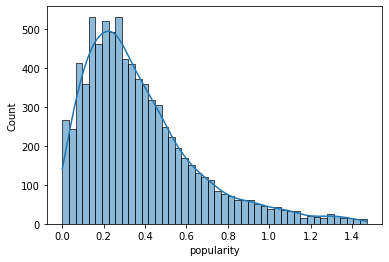

In [17]:
# Graph for popularity column
sns.histplot(movies_df['popularity'], kde=True)
plt.show()

- there is a high number of movies concantrated between 0.1-0.4 of popularity values.  
- low number of movies that get high popularity

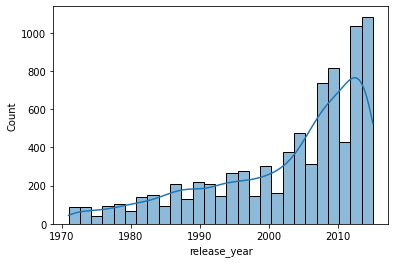

In [18]:
#Graph for release year column
sns.histplot(movies_df['release_year'], kde=True)
plt.show()

- high number of movies have been made in the recent years.

### splitting each value in genres to many rows 
so we can calculate it easly

In [46]:
movies_df['genres'] = movies_df['genres'].str.split('|') # spliting with pip
movies_df = movies_df.explode('genres') # make each genre independent in its own row
movies(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### grouping 'release_year', 'genres' columns with the summation of its popularity

In [20]:
# group the needed columns for analysis and sum each genre with it's popularity
genre_popularity = movies_df.groupby(['release_year', 'genres'])['popularity'].sum().reset_index()
genre_popularity

,release_year,genres,popularity
0,1971,Action,4.574634
1,1971,Adventure,1.479544
2,1971,Animation,0.630778
3,1971,Comedy,3.576622
4,1971,Crime,4.563638
...,...,...,...
858,2015,TV Movie,5.211474
859,2015,Thriller,53.290923
860,2015,Unknow,0.374344
861,2015,War,3.787912


In [21]:
#For each year, find the index of the genre with the highest 'popularity' value
most_popular_per_year = genre_popularity.loc[genre_popularity.groupby('release_year')['popularity'].idxmax()]
most_popular_per_year.tail()

,release_year,genres,popularity
768,2011,Drama,79.836691
788,2012,Drama,70.832255
809,2013,Drama,91.574952
829,2014,Drama,107.361526
849,2015,Drama,89.221576


### Getting the top 5 genres in the whole dataset

In [22]:
top_5 = genre_popularity.groupby('genres')['popularity'].sum().nlargest(5).index 

# checks if each genre in genres column exists
top_5_genres = genre_popularity[genre_popularity['genres'].isin(top_5)]

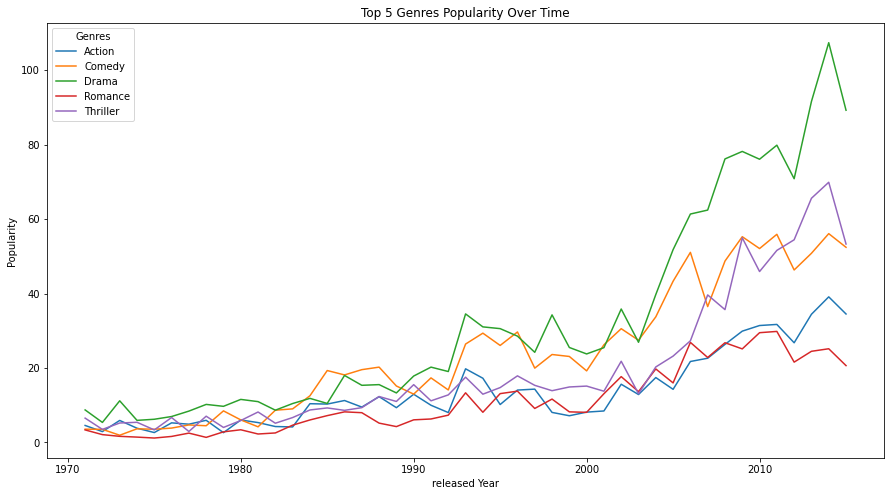

In [23]:
# The final result
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_5_genres, x='release_year', y='popularity', hue='genres')
plt.title("Top 5 Genres Popularity Over Time")
plt.xlabel("released Year")
plt.ylabel("Popularity")
plt.legend(title="Genres")
plt.show()

- in the last recent years between 2010-2015 the top 5 genres were (Drama-Thriller-Comedy-Action-Romance)

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

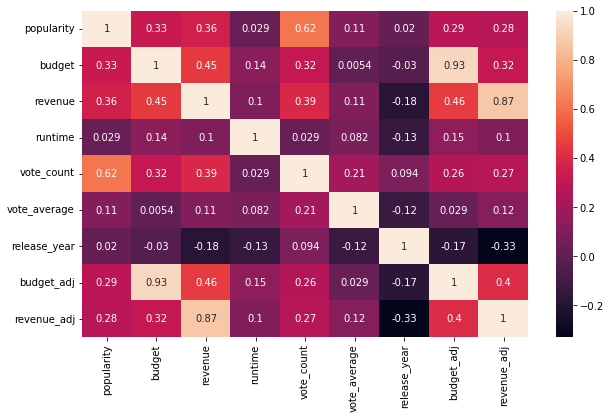

In [24]:
plt.figure(figsize=(10, 6))

select_numeric = movies_df.select_dtypes(include=['number']) # selecting column with numeric values only
corr = select_numeric.corr()

sns.heatmap(data=corr, annot=True); #source: 'https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap'
# it shows if there is a strong relation between feutures

### The most factors that affects the revenue for each movie is:  

(1) budget & budget_adj (correlations --> budget: 0.45, budget_adj: 0.46)  

(2) vote count (correlation with revenue: 0.39) 
 
(3) popularity (correlation with revenue: 0.36)


<a id='conclusions'></a>
# Conclusions

Key Findings:  
- The dataset contains information on various movies, including financial details, popularity, cast, and other  

- Popularity scores are relatively close in value, suggesting most movies have similar audience interest levels.

- Adjusted budget and revenue values provide a better comparison over time.

Initial Questions Answered:  
<ul>
<li> most 5 popular genres in the last recent years (drama-thriller-comedy-action-romance)
<li> the more budget we pay for the movies quality give us more revenues
<li> more votes indicate higher audience engagement
<li> popular movies tend to earn more money than unfamiliar ones 
</ul>

### another useful researches that can be done in this dataset

**Examine whether the release month or year impacts the movie's rating and popularity.*  
**Check if certain genres tend to have longer or shorter runtimes.* 



# Limitations
Data Quality Issues:  
- Some budget and revenue values are zero, indicate missing or unreported data   

Uncertainties:  
- The presence of well-known actors and directors might skew the dataset
